#**EKSPLORASI DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install lightgbm


In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import library yang diperlukan
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
# Import library yang diperlukan
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
# Import library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
# Import library yang diperlukan
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Import library yang diperlukan untuk evaluasi
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
# Ganti 'path_to_file.csv' dengan lokasi file dataset Anda
dataset = pd.read_csv('/content/updated_pollution_dataset.csv')

In [ ]:
# Lihat struktur dataset
print("Struktur Dataset:")
print(dataset.info())


Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB
None


In [ ]:
# Tampilkan 5 data pertama
print("\n5 Data Pertama:")
print(dataset.head())


5 Data Pertama:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  


In [ ]:
# Cek distribusi target (Air Quality)
print("\nDistribusi Target (Air Quality):")
print(dataset['Air Quality'].value_counts(normalize=True) * 100)  # Persentase tiap kategori



Distribusi Target (Air Quality):
Air Quality
Good         40.0
Moderate     30.0
Poor         20.0
Hazardous    10.0
Name: proportion, dtype: float64


<ipython-input-18-91d55157e958>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Air Quality', palette='viridis')


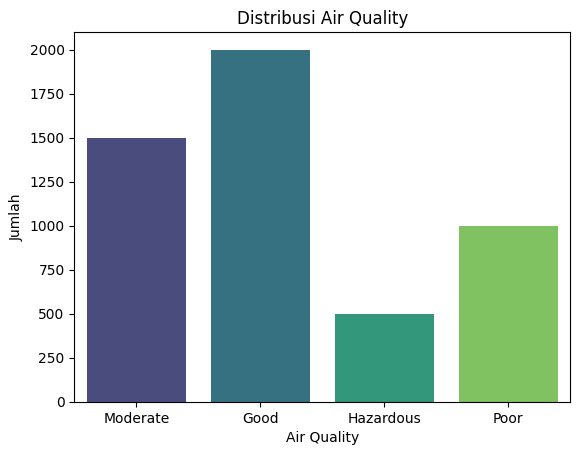

In [ ]:
# Visualisasi distribusi target
sns.countplot(data=dataset, x='Air Quality', palette='viridis')
plt.title('Distribusi Air Quality')
plt.xlabel('Air Quality')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Deskripsi statistik untuk fitur numerik
print("\nDeskripsi Statistik:")
print(dataset.describe())



Deskripsi Statistik:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                

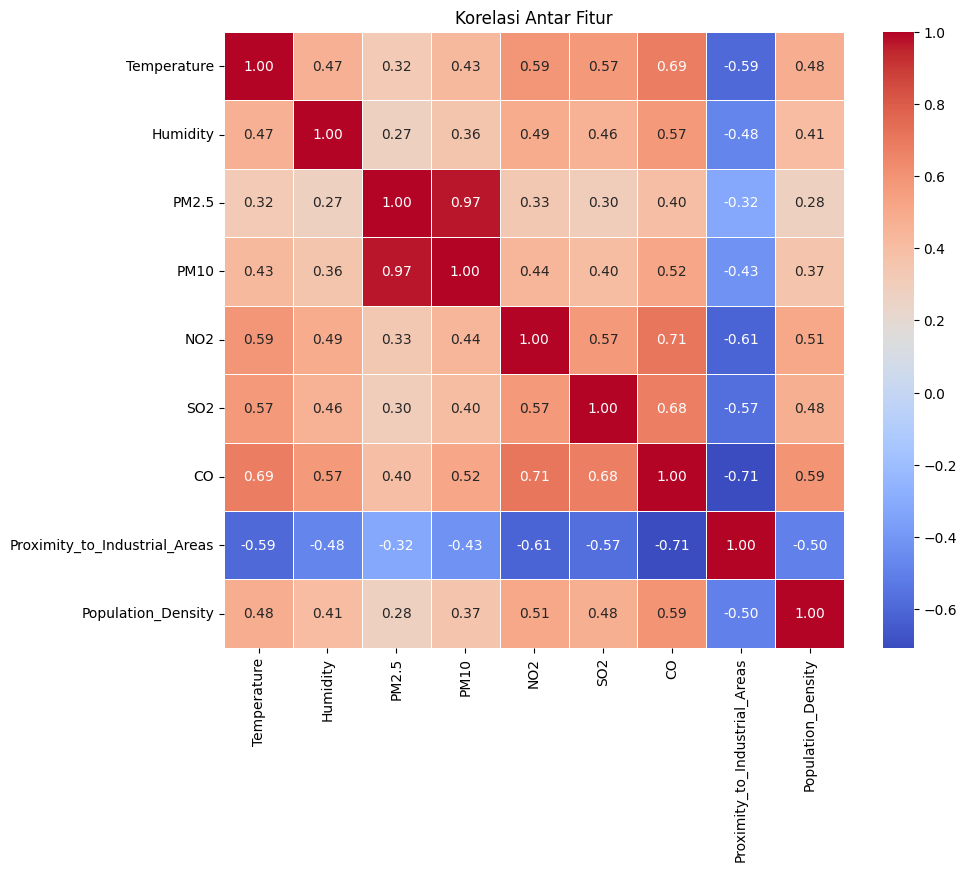

In [ ]:
# Korelasi antar fitur numerik
# Exclude non-numeric columns, like 'Air Quality', from the correlation calculation
correlation_matrix = dataset.select_dtypes(include=np.number).corr()

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Fitur')
plt.show()

In [ ]:
# Cek jumlah nilai kosong di tiap kolom
print("\nJumlah Nilai Kosong:")
print(dataset.isnull().sum())


Jumlah Nilai Kosong:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


<ipython-input-11-a2b3e1ea19f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=feature, palette='coolwarm')


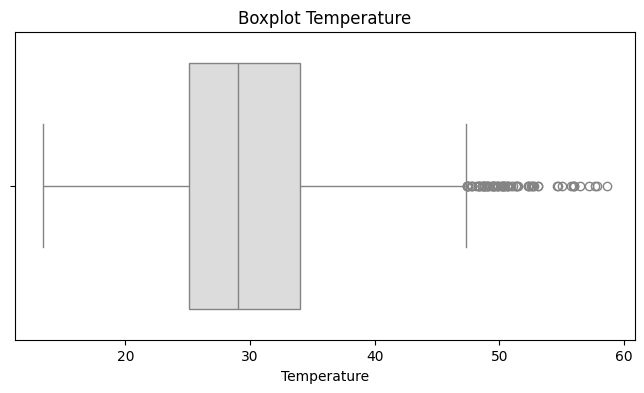

<ipython-input-11-a2b3e1ea19f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=feature, palette='coolwarm')


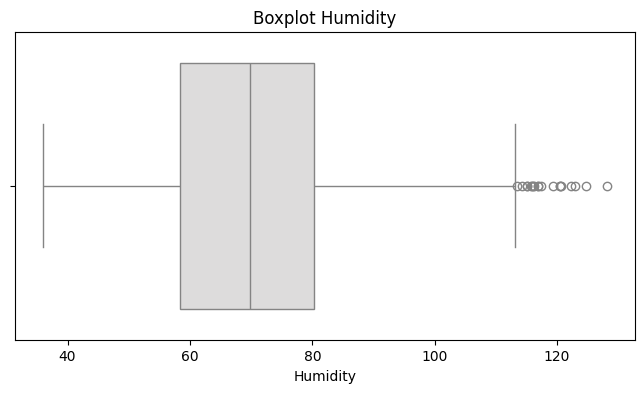

<ipython-input-11-a2b3e1ea19f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=feature, palette='coolwarm')


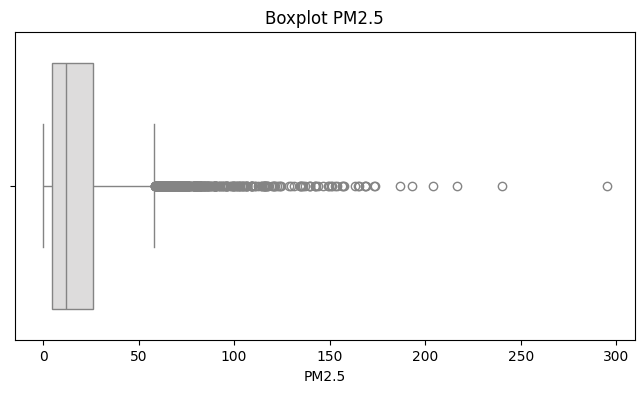

<ipython-input-11-a2b3e1ea19f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=feature, palette='coolwarm')


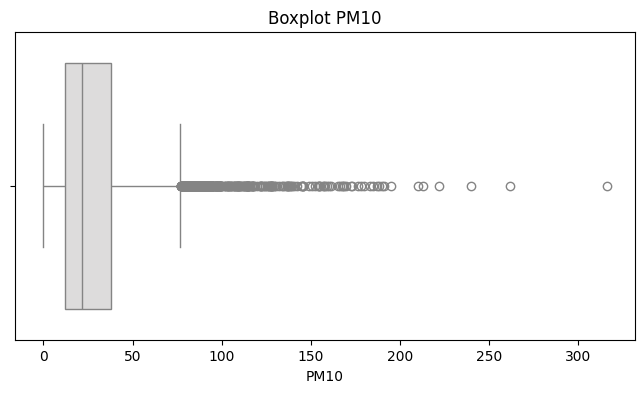

<ipython-input-11-a2b3e1ea19f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=feature, palette='coolwarm')


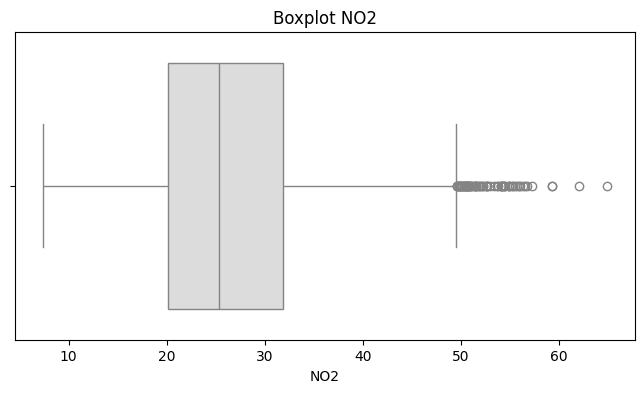

<ipython-input-11-a2b3e1ea19f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=feature, palette='coolwarm')


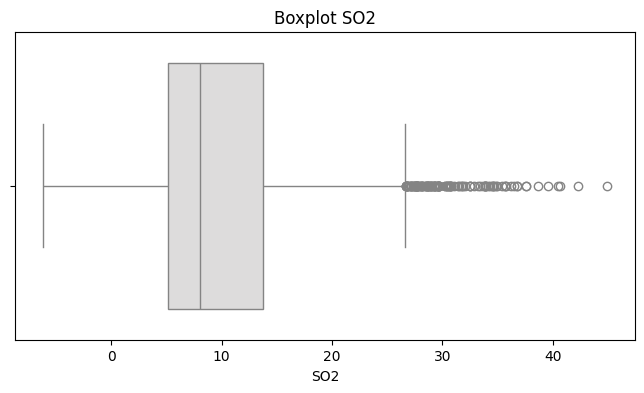

<ipython-input-11-a2b3e1ea19f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=feature, palette='coolwarm')


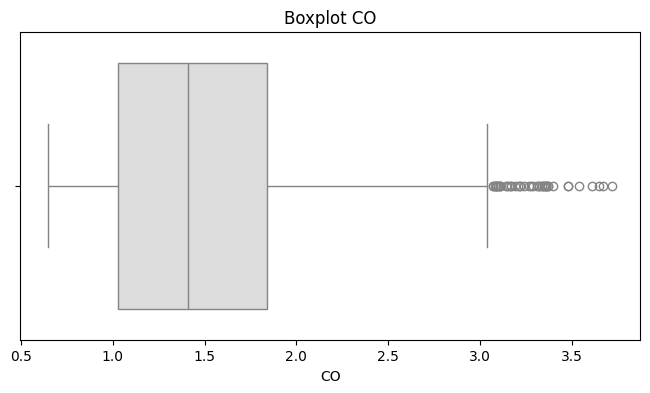

<ipython-input-11-a2b3e1ea19f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=feature, palette='coolwarm')


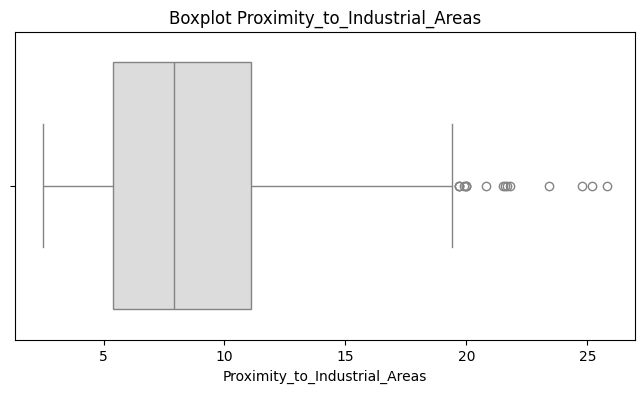

<ipython-input-11-a2b3e1ea19f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x=feature, palette='coolwarm')


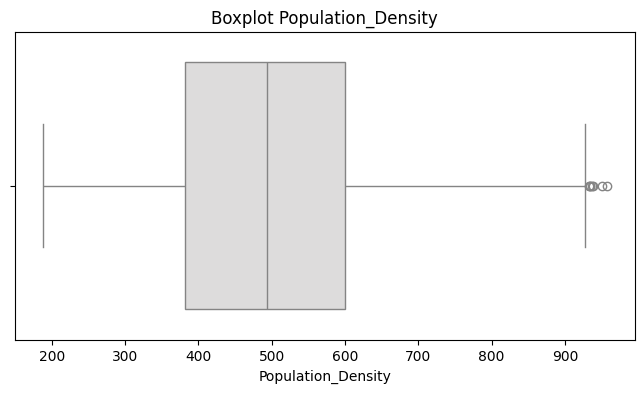

In [ ]:
# Boxplot untuk deteksi outlier
numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=dataset, x=feature, palette='coolwarm')
    plt.title(f'Boxplot {feature}')
    plt.show()

In [ ]:
# Z-score untuk mendeteksi outlier (threshold: > 3 atau < -3)
z_scores = np.abs((dataset[numerical_features] - dataset[numerical_features].mean()) / dataset[numerical_features].std())
outlier_indices = np.where(z_scores > 3)
print("\nIndeks Outlier yang Terdeteksi:")
print(outlier_indices)


Indeks Outlier yang Terdeteksi:
(array([  29,   29,   39,   50,   53,   53,   62,   67,  107,  108,  114,
        114,  114,  146,  146,  151,  151,  176,  178,  180,  180,  180,
        231,  231,  232,  249,  282,  294,  298,  298,  313,  345,  348,
        348,  375,  375,  391,  391,  404,  404,  477,  509,  525,  525,
        545,  549,  560,  560,  571,  571,  571,  605,  605,  631,  667,
        667,  670,  706,  754,  768,  768,  787,  787,  806,  806,  806,
        826,  829,  834,  860,  860,  869,  869,  882,  882,  968,  981,
        981, 1014, 1014, 1053, 1053, 1069, 1095, 1095, 1114, 1116, 1116,
       1132, 1132, 1168, 1215, 1219, 1219, 1272, 1303, 1303, 1330, 1330,
       1336, 1407, 1407, 1412, 1441, 1450, 1457, 1479, 1500, 1500, 1501,
       1503, 1519, 1519, 1529, 1531, 1553, 1554, 1554, 1554, 1579, 1584,
       1584, 1585, 1585, 1594, 1599, 1599, 1630, 1630, 1650, 1650, 1650,
       1682, 1724, 1724, 1766, 1815, 1844, 1844, 1845, 1854, 1854, 1855,
       1856, 1863

# **PRE-PROCESSING DATA**

In [ ]:
# Cek kolom kategorikal
categorical_columns = dataset.select_dtypes(include=['object']).columns
print("Kolom Kategorikal:")
print(categorical_columns)


Kolom Kategorikal:
Index(['Air Quality'], dtype='object')


In [ ]:
# Encode kolom 'Air Quality' menggunakan Label Encoding
if 'Air Quality' in categorical_columns:
    label_encoder = LabelEncoder()
    dataset['Air Quality'] = label_encoder.fit_transform(dataset['Air Quality'])
    print("\nLabel Encoding pada 'Air Quality':")
    print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label Encoding pada 'Air Quality':
{'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Poor': 3}


In [ ]:
# Cek kolom numerik
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
print("\nKolom Numerik:")
print(numerical_columns)


Kolom Numerik:
Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')


In [ ]:
# Normalisasi menggunakan Min-Max Scaler
min_max_scaler = MinMaxScaler()
dataset_normalized = dataset.copy()
dataset_normalized[numerical_columns] = min_max_scaler.fit_transform(dataset[numerical_columns])
print("\nDataset Setelah Normalisasi (Min-Max):")
print(dataset_normalized.head())


Dataset Setelah Normalisasi (Min-Max):
   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.362832  0.250814  0.017627  0.057278  0.200000  0.301370  0.348534   
1     0.329646  0.429967  0.007797  0.039241  0.406957  0.311155  0.322476   
2     0.214602  0.420195  0.090508  0.107595  0.295652  0.367906  0.319218   
3     0.303097  0.033659  0.020678  0.020570  0.106087  0.225049  0.162866   
4     0.289823  0.376764  0.023390  0.051266  0.252174  0.230920  0.117264   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                       0.163090            0.170351     0.666667  
1                       0.150215            0.550065     0.666667  
2                       0.115880            0.560468     0.666667  
3                       0.369099            0.472042     0.000000  
4                       0.437768            0.149545     0.000000  


In [ ]:
 #Standarisasi menggunakan Standard Scaler
standard_scaler = StandardScaler()
dataset_standardized = dataset.copy()
dataset_standardized[numerical_columns] = standard_scaler.fit_transform(dataset[numerical_columns])
print("\nDataset Setelah Standarisasi:")
print(dataset_standardized.head())


Dataset Setelah Standarisasi:
   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0    -0.034080 -0.690715 -0.608589 -0.450455 -0.844581 -0.120721  0.402303   
1    -0.257295  0.349507 -0.726706 -0.658892  0.493329 -0.046643  0.255775   
2    -1.031106  0.292768  0.267100  0.130973 -0.226219  0.383011  0.237459   
3    -0.435867 -1.951591 -0.571933 -0.874642 -1.451700 -0.698530 -0.641707   
4    -0.525153  0.040593 -0.539349 -0.519934 -0.507293 -0.654083 -0.898130   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                      -0.588658           -1.168163     0.589506  
1                      -0.671748            0.743598     0.589506  
2                      -0.893318            0.795975     0.589506  
3                       0.740767            0.350770    -1.094797  
4                       1.183909           -1.272917    -1.094797  


# **BALANCING DATA**

In [ ]:
# Cek distribusi target setelah encoding
print("Distribusi Target Sebelum Penyeimbangan:")
print(dataset['Air Quality'].value_counts())


Distribusi Target Sebelum Penyeimbangan:
Air Quality
0    2000
2    1500
3    1000
1     500
Name: count, dtype: int64


<ipython-input-31-8d199f796ed2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Air Quality', palette='viridis')


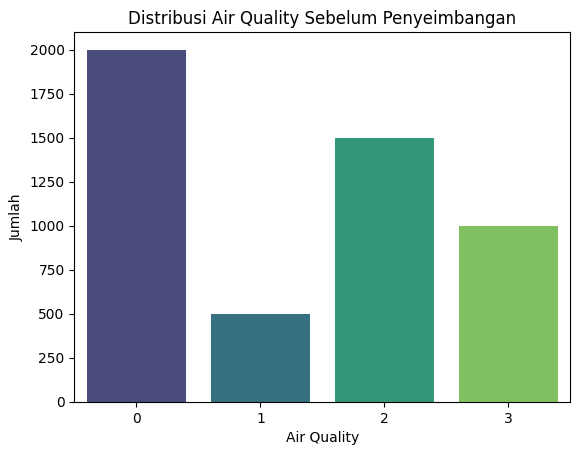

In [ ]:
# Visualisasi distribusi target
sns.countplot(data=dataset, x='Air Quality', palette='viridis')
plt.title('Distribusi Air Quality Sebelum Penyeimbangan')
plt.xlabel('Air Quality')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Pisahkan fitur dan target
X = dataset.drop(columns=['Air Quality'])
y = dataset['Air Quality']

In [ ]:
# 1. Oversampling dengan SMOTE
print("\nOversampling dengan SMOTE:")
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("Distribusi Target Setelah SMOTE:")
print(np.bincount(y_smote))


Oversampling dengan SMOTE:
Distribusi Target Setelah SMOTE:
[2000 2000 2000 2000]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


<ipython-input-34-6c194ab1affc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote, palette='coolwarm')


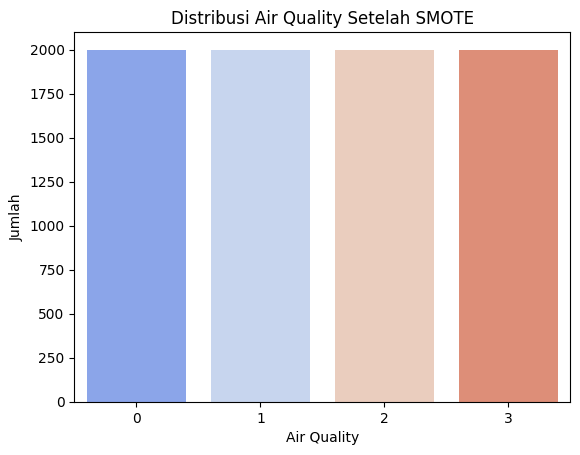

In [ ]:
# Visualisasi hasil SMOTE
sns.countplot(x=y_smote, palette='coolwarm')
plt.title('Distribusi Air Quality Setelah SMOTE')
plt.xlabel('Air Quality')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# 2. Undersampling
print("\nUndersampling:")
# Gabungkan kembali X dan y untuk proses undersampling
data_combined = pd.concat([X, y], axis=1)


Undersampling:


In [ ]:
# Pilih kelas mayoritas dan minoritas
majority_class = y.value_counts().idxmax()
minority_class = y.value_counts().idxmin()

In [ ]:
# Data mayoritas dan minoritas
majority_data = data_combined[data_combined['Air Quality'] == majority_class]
minority_data = data_combined[data_combined['Air Quality'] == minority_class]

In [ ]:
# Undersample kelas mayoritas
majority_data_downsampled = resample(majority_data,
                                     replace=False,
                                     n_samples=len(minority_data),
                                     random_state=42)

# Gabungkan kembali data
undersampled_data = pd.concat([majority_data_downsampled, minority_data])
X_undersampled = undersampled_data.drop(columns=['Air Quality'])
y_undersampled = undersampled_data['Air Quality']

print("Distribusi Target Setelah Undersampling:")
print(y_undersampled.value_counts())

Distribusi Target Setelah Undersampling:
Air Quality
0    500
1    500
Name: count, dtype: int64


<ipython-input-39-12c5fc0707c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_undersampled, palette='plasma')


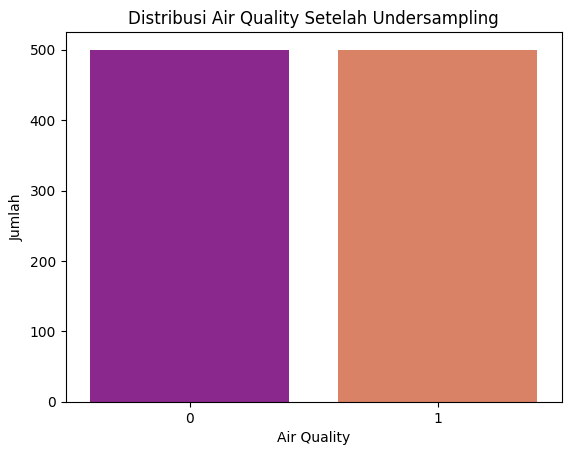

In [ ]:
# Visualisasi hasil undersampling
sns.countplot(x=y_undersampled, palette='plasma')
plt.title('Distribusi Air Quality Setelah Undersampling')
plt.xlabel('Air Quality')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# 3. Menggunakan Class Weights (Untuk LightGBM)
print("\nMenggunakan Class Weights:")
# Hitung class weights secara proporsional
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:")
print(class_weights_dict)



Menggunakan Class Weights:
Class Weights:
{0: 0.625, 1: 2.5, 2: 0.8333333333333334, 3: 1.25}


# **MEMBAGI DATASET**

In [ ]:
# Pisahkan dataset menjadi train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_smote,  # Ganti dengan X jika tidak menggunakan SMOTE
    y_smote,  # Ganti dengan y jika tidak menggunakan SMOTE
    test_size=0.2,  # 20% untuk test set
    random_state=42,
    stratify=y_smote  # Memastikan distribusi target tetap seimbang
)

In [ ]:
# Cek distribusi target pada train dan test set
print("Distribusi Target pada Train Set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nDistribusi Target pada Test Set:")
print(y_test.value_counts(normalize=True) * 100)


Distribusi Target pada Train Set:
Air Quality
2    25.0
1    25.0
3    25.0
0    25.0
Name: proportion, dtype: float64

Distribusi Target pada Test Set:
Air Quality
3    25.0
2    25.0
1    25.0
0    25.0
Name: proportion, dtype: float64


In [ ]:
# Buat objek StratifiedKFold untuk cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Contoh penggunaan StratifiedKFold
print("\nStratified K-Fold Splits:")
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    print(f"Fold {fold}:")
    print(f"  Train indices: {train_idx[:5]}... (total {len(train_idx)})")
    print(f"  Validation indices: {val_idx[:5]}... (total {len(val_idx)})")


Stratified K-Fold Splits:
Fold 1:
  Train indices: [0 3 4 5 6]... (total 5120)
  Validation indices: [ 1  2  9 10 11]... (total 1280)
Fold 2:
  Train indices: [1 2 7 8 9]... (total 5120)
  Validation indices: [0 3 4 5 6]... (total 1280)
Fold 3:
  Train indices: [0 1 2 3 4]... (total 5120)
  Validation indices: [ 7 15 19 20 26]... (total 1280)
Fold 4:
  Train indices: [0 1 2 3 4]... (total 5120)
  Validation indices: [ 8 12 23 24 32]... (total 1280)
Fold 5:
  Train indices: [0 1 2 3 4]... (total 5120)
  Validation indices: [17 21 36 37 38]... (total 1280)


# **Model Training dengan LightGBM**

In [ ]:
# Definisikan parameter dasar dan ruang pencarian untuk Grid Search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15],
    'num_leaves': [20, 30, 50],
    'class_weight': ['balanced']  # Menangani data imbalanced
}


In [ ]:
# Inisialisasi model LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)

In [ ]:
# Grid Search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [ ]:
# Jalankan Grid Search pada data train
print("\nMelakukan Hyperparameter Tuning...")
grid_search.fit(X_train, y_train)



Melakukan Hyperparameter Tuning...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 9
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [20, 30, 50]},
             scoring='accuracy', verbose=1)

In [ ]:
# Tampilkan parameter terbaik
print("\nParameter Terbaik:")
print(grid_search.best_params_)


Parameter Terbaik:
{'class_weight': 'balanced', 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500, 'num_leaves': 50}


In [ ]:
# Gunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Latih model pada data train
print("\nMelatih Model LightGBM...")
best_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = best_model.predict(X_test)



Melatih Model LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 9
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [ ]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[400   0   0   0]
 [  0 394   0   6]
 [  0   0 392   8]
 [  0   9  17 374]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.98      0.98      0.98       400
           2       0.96      0.98      0.97       400
           3       0.96      0.94      0.95       400

    accuracy                           0.97      1600
   macro avg       0.98      0.97      0.97      1600
weighted avg       0.98      0.97      0.97      1600


Accuracy: 0.975


# **Evaluasi Model**

In [ ]:
# Prediksi pada data test
y_pred = best_model.predict(X_test)


In [ ]:
 #Jika menggunakan probabilitas, prediksi probabilitas kelas positif
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas 1


In [ ]:
# 1. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[400   0   0   0]
 [  0 394   0   6]
 [  0   0 392   8]
 [  0   9  17 374]]


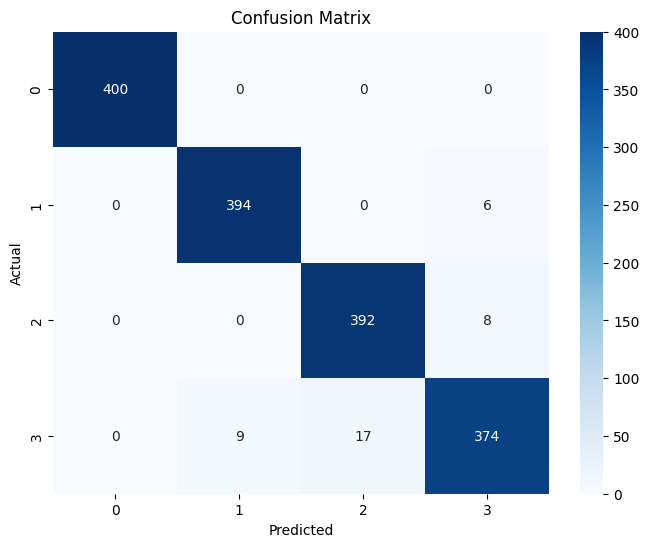

In [ ]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.975


In [ ]:
# 3. Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.98      0.98      0.98       400
           2       0.96      0.98      0.97       400
           3       0.96      0.94      0.95       400

    accuracy                           0.97      1600
   macro avg       0.98      0.97      0.97      1600
weighted avg       0.98      0.97      0.97      1600



ROC-AUC for class 0: 1.00
ROC-AUC for class 1: 1.00
ROC-AUC for class 2: 1.00
ROC-AUC for class 3: 0.99


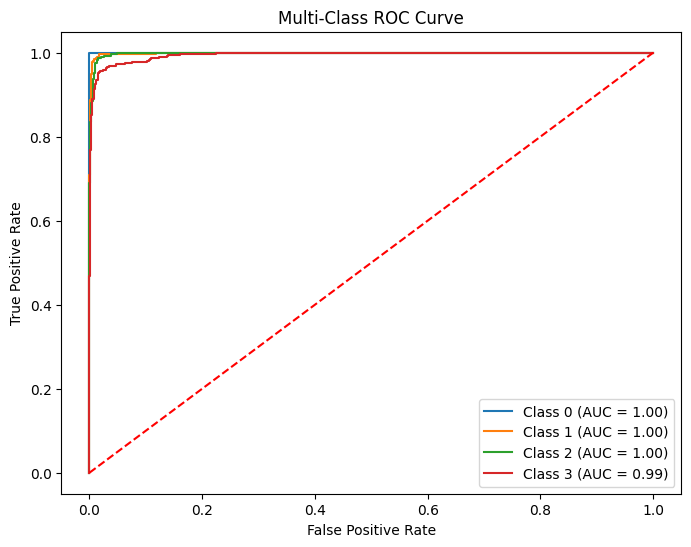

In [ ]:
from sklearn.preprocessing import label_binarize

# Pastikan target (y_test) diubah ke bentuk biner untuk multi-class
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_proba_all = best_model.predict_proba(X_test)  # Probabilitas untuk semua kelas

# Hitung ROC-AUC untuk setiap kelas
roc_auc_scores = []
for i, class_name in enumerate(classes):
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_proba_all[:, i])
    roc_auc_scores.append(roc_auc)
    print(f"ROC-AUC for class {class_name}: {roc_auc:.2f}")

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_proba_all[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_name} (AUC = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend()
plt.show()


# **INFORMASI MENGENAI DATA SET**
Dataset ini diambil dari Kaggle dengan judul "Air Quality and Pollution Assessment", yang mencakup data lingkungan seperti suhu, kelembapan, dan konsentrasi polutan untuk analisis kualitas udara.
Link Dataset:
https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment

